Basic Information extract - cash request - data analyst.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                    

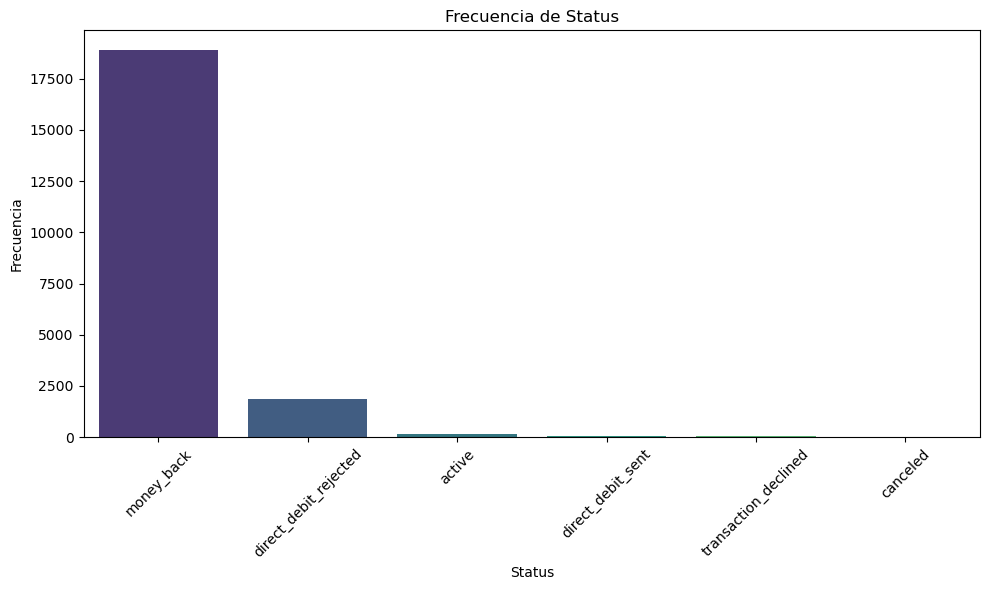

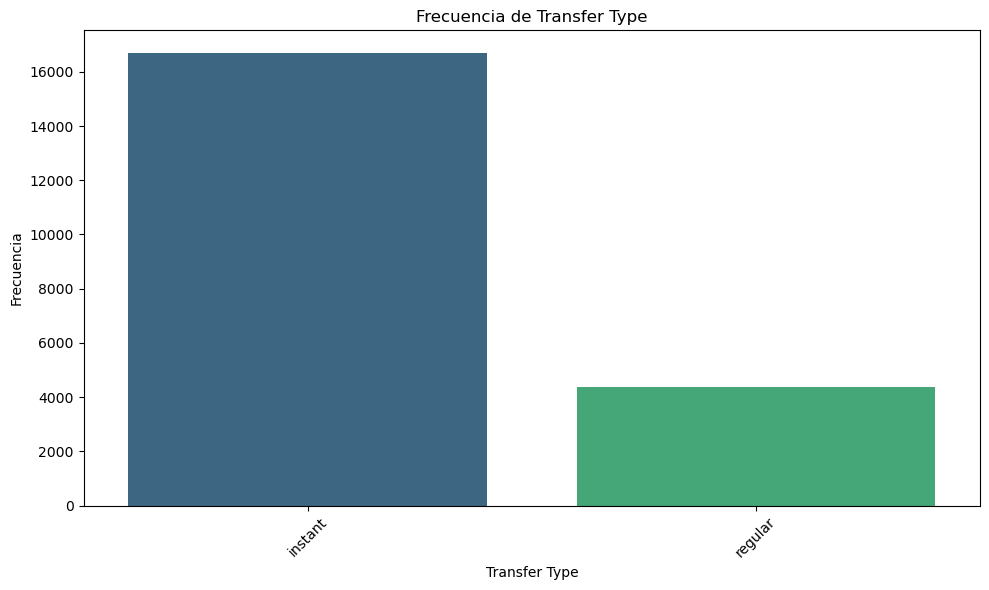

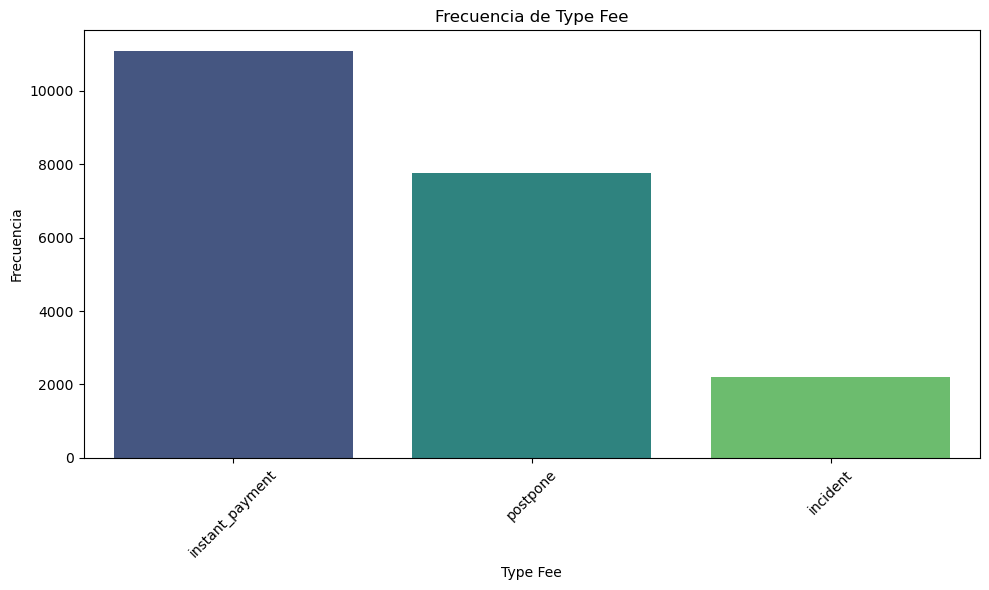

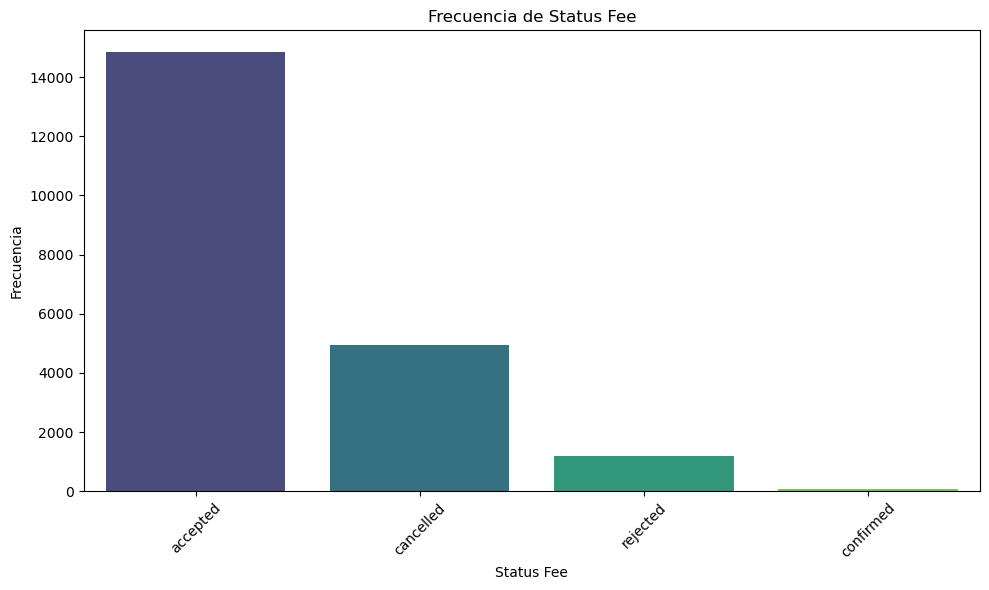

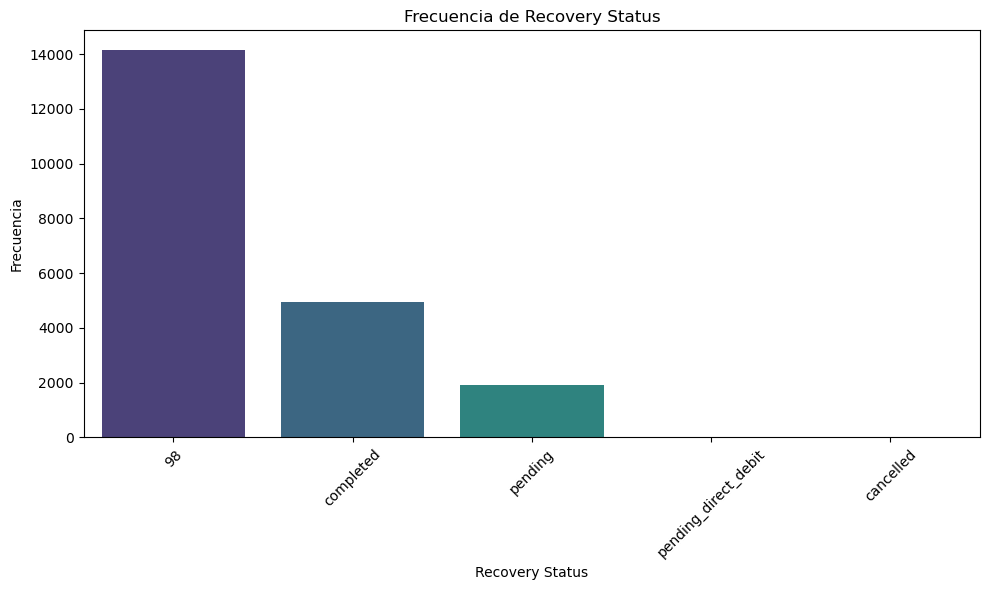

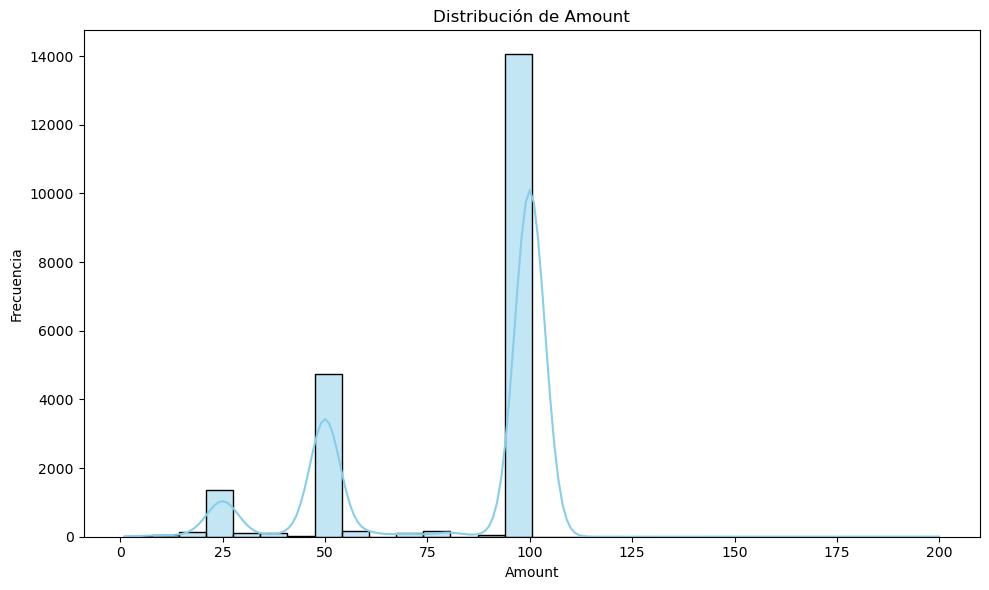

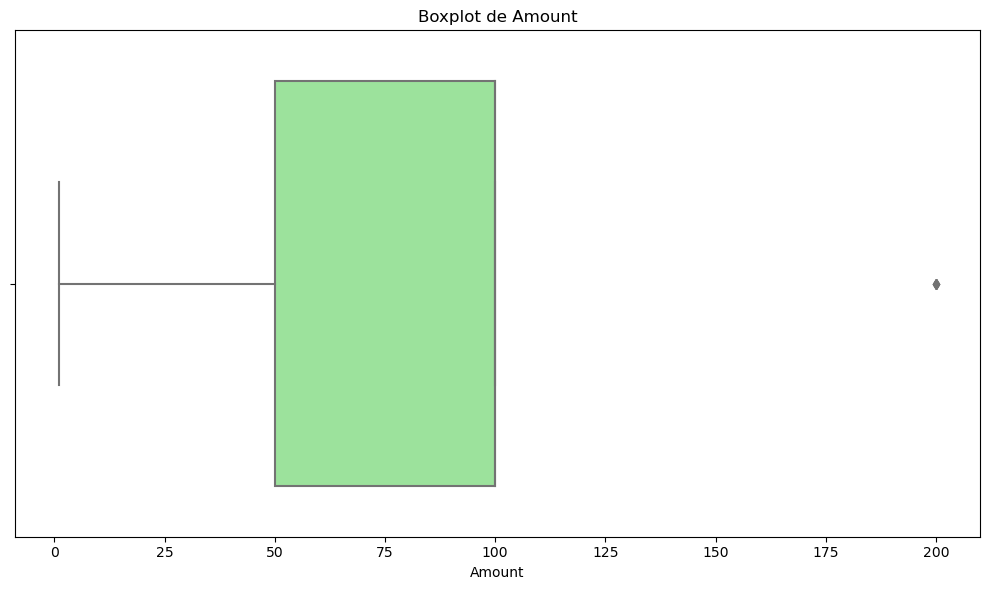

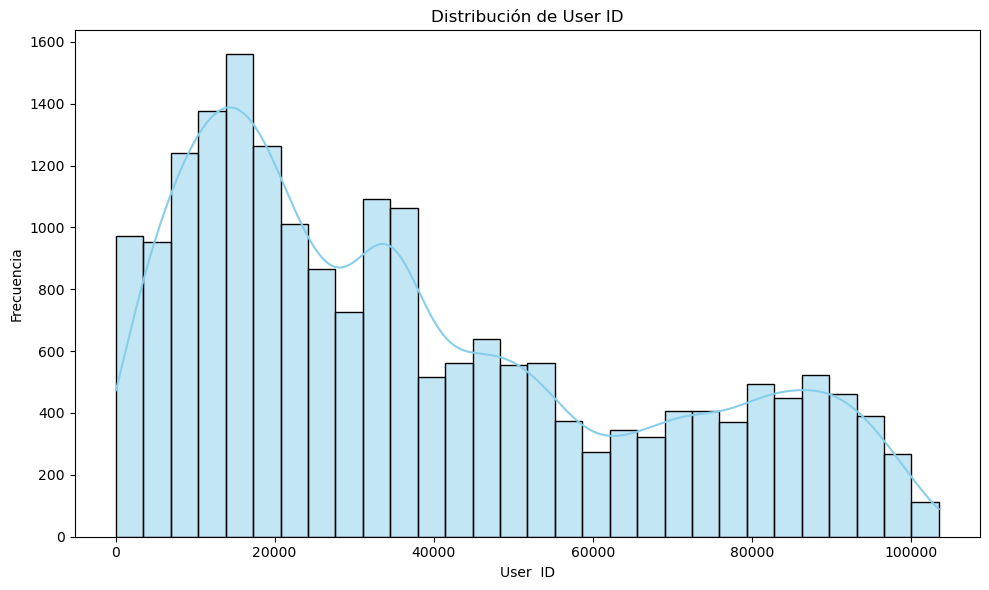

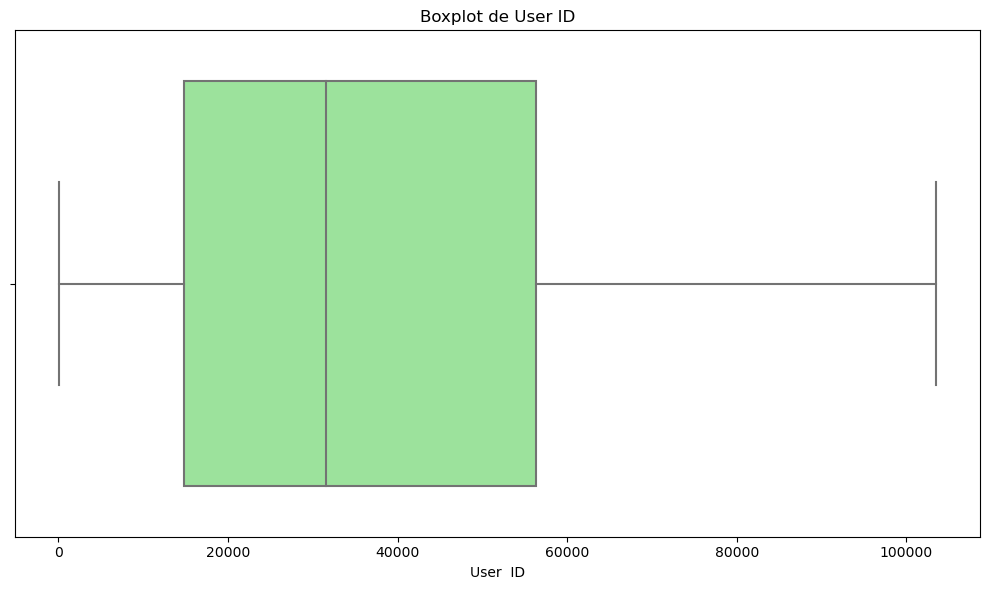

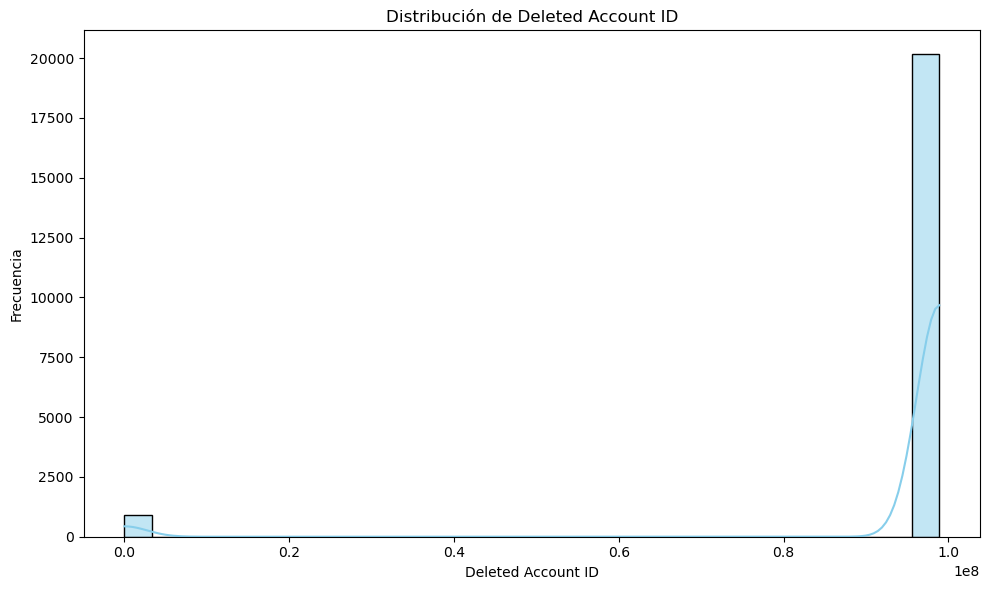

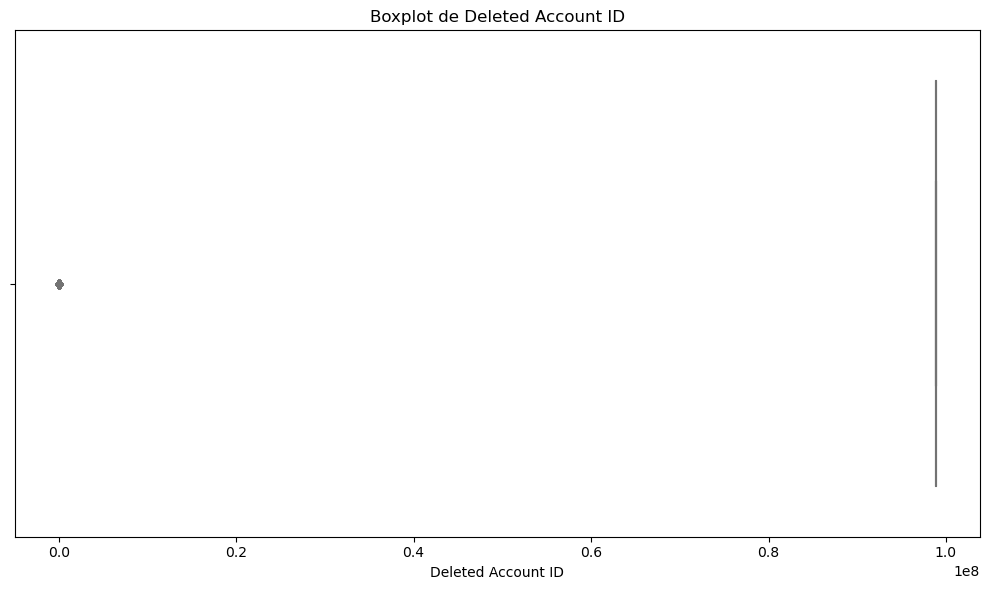

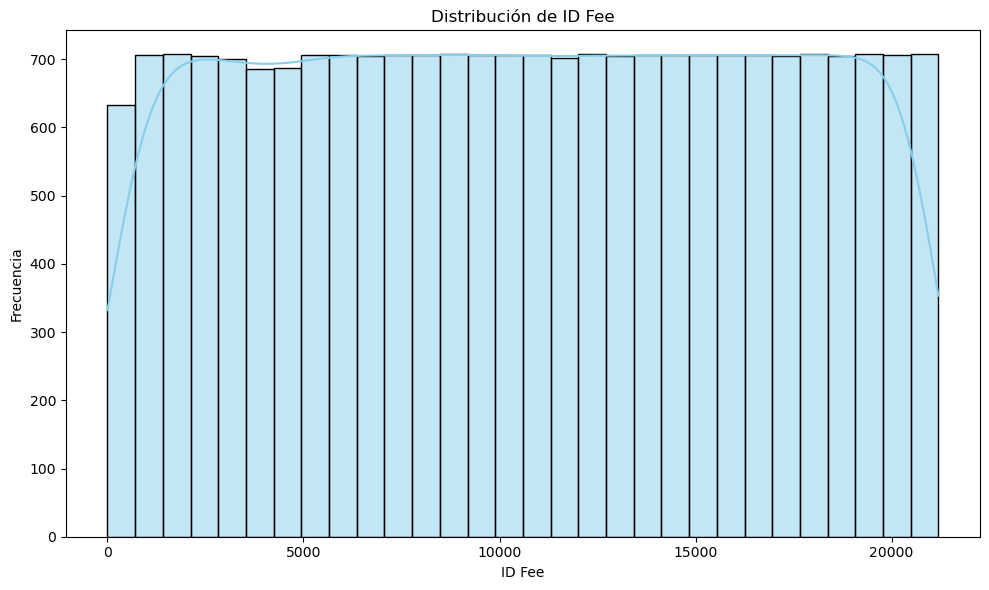

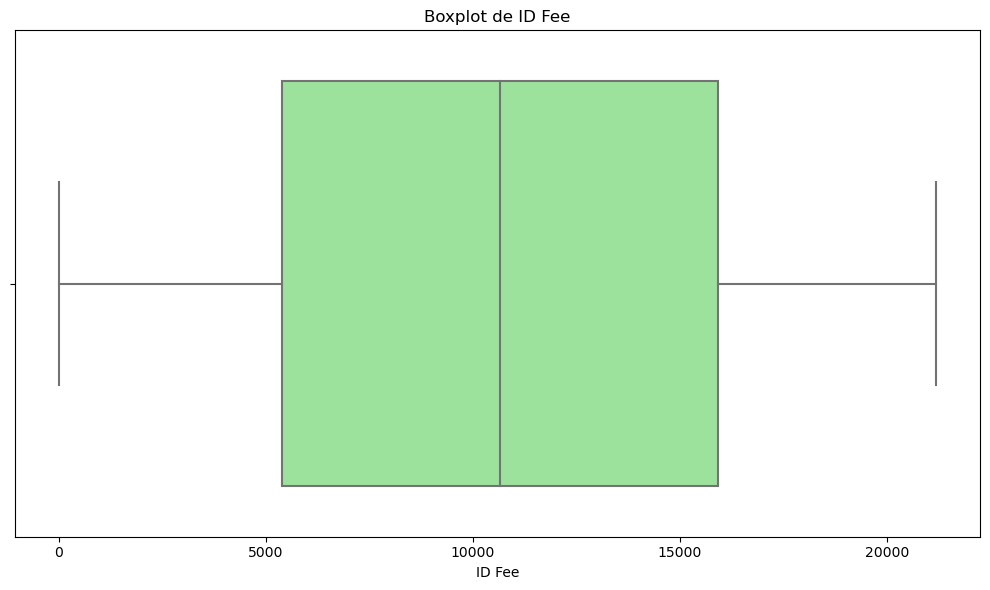

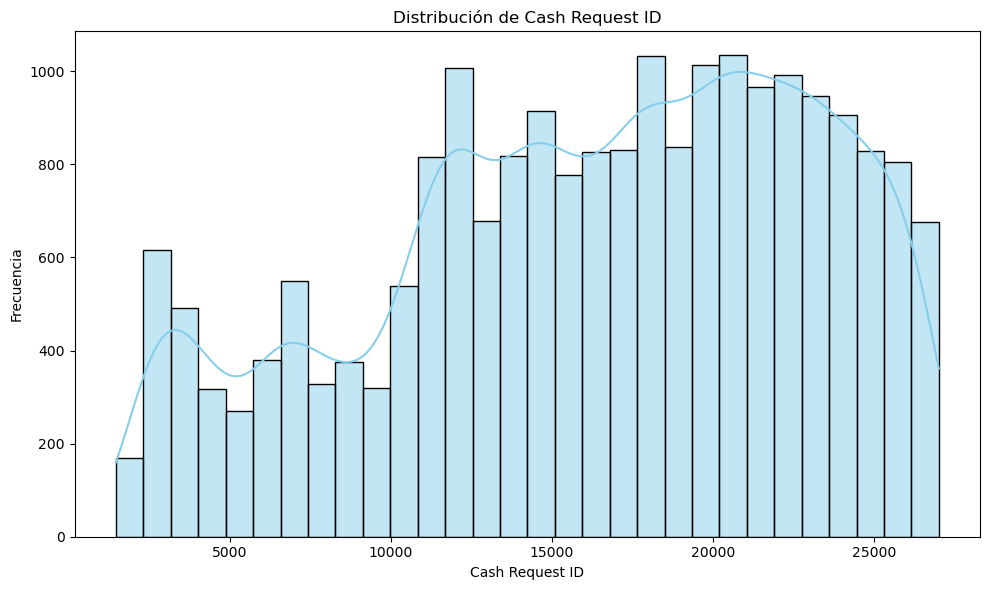

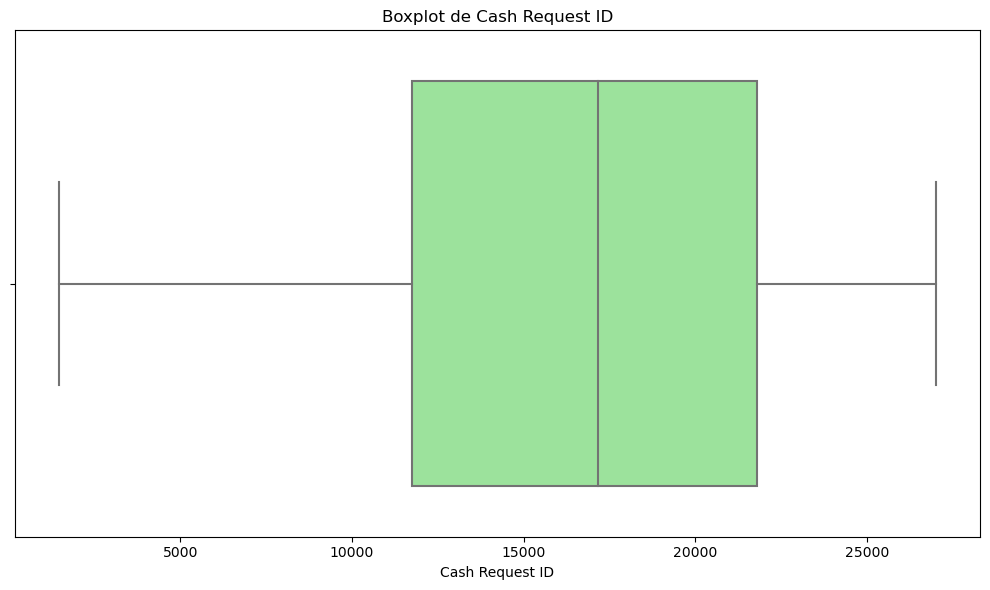

In [1]:
%run analisis_calidad_datos2.ipynb

In [2]:
merged_df.head()

id  amount      status                     created_at  \
0  23534    25.0  money_back  2020-10-23 15:20:26.163927+00   
1   2203   100.0  money_back   2020-05-27 02:26:27.61519+00   
2   6098   100.0      active   2020-07-01 09:30:03.14541+00   
3   6098   100.0      active   2020-07-01 09:30:03.14541+00   
4   6098   100.0      active   2020-07-01 09:30:03.14541+00   

                      updated_at  user_id                   moderated_at  \
0  2020-12-18 13:08:29.099365+00  21465.0                             98   
1   2020-06-09 11:25:51.72636+00   2109.0  2020-05-27 10:02:13.094467+00   
2  2020-08-11 22:27:58.240406+00  23328.0  2020-07-01 16:44:53.070844+00   
3  2020-08-11 22:27:58.240406+00  23328.0  2020-07-01 16:44:53.070844+00   
4  2020-08-11 22:27:58.240406+00  23328.0  2020-07-01 16:44:53.070844+00   

   deleted_account_id      reimbursement_date cash_request_received_date  ...  \
0          98888888.0  2020-11-10 23:51:00+00                         98  ...   
1          98888888.0  2020-07-15 02:26:27+00                 2020-05-29  ...   
2          98888888.0  2020-08-03 22:00:00+00                 2020-07-03  ...   
3          98888888.0  2020-08-03 22:00:00+00                 2020-07-03  ...   
4          98888888.0  2020-08-03 22:00:00+00                 2020-07-03  ...   

  status_fee category_fee total_amount_fee  \
0   accepted         Null              5.0   
1   accepted         Null              5.0   
2  cancelled         Null              5.0   
3  cancelled         Null              5.0   
4  cancelled         Null              5.0   

                           reason_fee                 created_at_fee  \
0  Instant Payment Cash Request 23534  2020-10-23 15:21:35.895711+00   
1          Postpone Cash Request 2203  2020-06-09 11:25:52.449808+00   
2          Postpone Cash Request 6098   2020-08-13 10:58:39.63422+00   
3          Postpone Cash Request 6098  2020-08-13 10:58:52.603153+00   
4          Postpone Cash Request 6098  2020-08-13 11:00:39.879521+00   

                  updated_at_fee                    paid_at_fee  \
0   2020-10-23 15:21:35.89574+00  2020-11-06 07:16:22.014422+00   
1  2020-10-13 14:25:00.867548+00                           Null   
2  2020-10-13 14:25:16.660127+00                           Null   
3  2020-10-13 14:25:16.661371+00                           Null   
4  2020-10-13 14:25:16.662449+00                           Null   

            from_date_fee                 to_date_fee charge_moment_fee  
0                      98                          98             after  
1  2020-06-15 02:26:27+00      2020-07-15 02:26:27+00            before  
2  2020-08-03 22:00:00+00  2020-09-03 10:58:32.274+00             after  
3  2020-08-03 22:00:00+00  2020-09-03 10:58:32.274+00             after  
4  2020-08-03 22:00:00+00  2020-09-01 11:00:34.027+00             after  

[5 rows x 29 columns]

In [3]:
merged_df['reason_fee'].unique()

array(['Instant Payment Cash Request 23534', 'Postpone Cash Request 2203',
       'Postpone Cash Request 6098', ...,
       'Instant Payment Cash Request 20256',
       'Postpone Cash Request 19886',
       'Instant Payment Cash Request 19886'], dtype=object)

In [4]:
# Verificar si cada reason_fee tiene el mismo total_amount_fee
fee_check = merged_df.groupby('reason_fee')['total_amount_fee'].nunique()

# Mostrar los resultados
print("Número de valores únicos de total_amount_fee por reason_fee:")
print(fee_check)

# Filtrar las que no tienen un solo valor único
non_unique_fees = fee_check[fee_check > 1]
print("\nTipos de reason_fee con valores diferentes de total_amount_fee:")
print(non_unique_fees)

Número de valores únicos de total_amount_fee por reason_fee:
reason_fee
Instant Payment Cash Request 10000    1
Instant Payment Cash Request 10003    1
Instant Payment Cash Request 10010    1
Instant Payment Cash Request 10012    1
Instant Payment Cash Request 10016    1
                                     ..
month delay on payment - 11/2020      1
month delay on payment - 7/2020       1
month delay on payment - 8/2020       1
month delay on payment - 9/2020       1
rejected direct debit                 1
Name: total_amount_fee, Length: 15145, dtype: int64

Tipos de reason_fee con valores diferentes de total_amount_fee:
Series([], Name: total_amount_fee, dtype: int64)


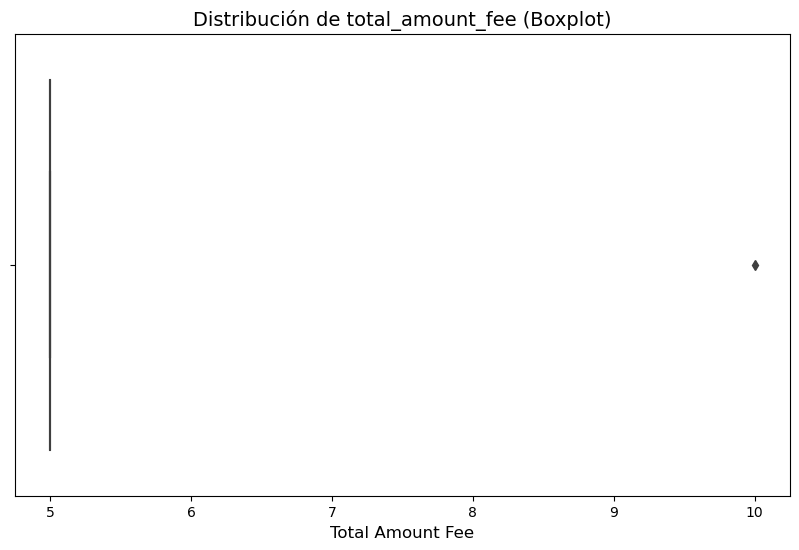

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un boxplot para total_amount_fee
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['total_amount_fee'])

# Agregar título y etiquetas
plt.title('Distribución de total_amount_fee (Boxplot)', fontsize=14)
plt.xlabel('Total Amount Fee', fontsize=12)
plt.show()


In [6]:
outlier = merged_df[merged_df['total_amount_fee'] == 10]
print(outlier)


          id  amount      status                     created_at  \
20611  22799    50.0  money_back  2020-10-21 13:01:03.763352+00   

                          updated_at  user_id moderated_at  \
20611  2020-12-18 13:15:58.632431+00      NaN           98   

       deleted_account_id      reimbursement_date cash_request_received_date  \
20611             24579.0  2020-10-30 22:00:00+00                         98   

       ... status_fee category_fee total_amount_fee  \
20611  ...   accepted         Null             10.0   

                               reason_fee                 created_at_fee  \
20611  Instant Payment Cash Request 22799  2020-10-21 13:01:52.493241+00   

                      updated_at_fee             paid_at_fee  from_date_fee  \
20611  2021-01-21 15:42:51.372269+00  2020-10-30 00:18:41+00             98   

      to_date_fee charge_moment_fee  
20611          98             after  

[1 rows x 29 columns]


In [7]:
cash_request_df.head()

id  amount    status                     created_at  \
0     5   100.0  rejected  2019-12-10 19:05:21.596873+00   
1    70   100.0  rejected   2019-12-10 19:50:12.34778+00   
2     7   100.0  rejected   2019-12-10 19:13:35.82546+00   
3    10    99.0  rejected  2019-12-10 19:16:10.880172+00   
4  1594   100.0  rejected  2020-05-06 09:59:38.877376+00   

                      updated_at  user_id                   moderated_at  \
0   2019-12-11 16:47:42.40783+00    804.0  2019-12-11 16:47:42.405646+00   
1  2019-12-11 14:24:22.900054+00    231.0  2019-12-11 14:24:22.897988+00   
2  2019-12-11 09:46:59.779773+00    191.0  2019-12-11 09:46:59.777728+00   
3  2019-12-18 14:26:18.136163+00    761.0  2019-12-18 14:26:18.128407+00   
4   2020-05-07 09:21:55.34008+00   7686.0  2020-05-07 09:21:55.320193+00   

   deleted_account_id             reimbursement_date  \
0                 NaN  2020-01-09 19:05:21.596363+00   
1                 NaN   2020-01-09 19:50:12.34778+00   
2                 NaN  2020-01-09 19:13:35.825041+00   
3                 NaN  2020-01-09 19:16:10.879606+00   
4                 NaN         2020-06-05 22:00:00+00   

  cash_request_received_date money_back_date transfer_type send_at  \
0                        NaN             NaN       regular     NaN   
1                        NaN             NaN       regular     NaN   
2                        NaN             NaN       regular     NaN   
3                        NaN             NaN       regular     NaN   
4                        NaN             NaN       regular     NaN   

  recovery_status reco_creation reco_last_update  
0             NaN           NaN              NaN  
1             NaN           NaN              NaN  
2             NaN           NaN              NaN  
3             NaN           NaN              NaN  
4             NaN           NaN              NaN

In [8]:
media_amount = cash_request_df["amount"].mean()
print(media_amount)

82.72081768877764


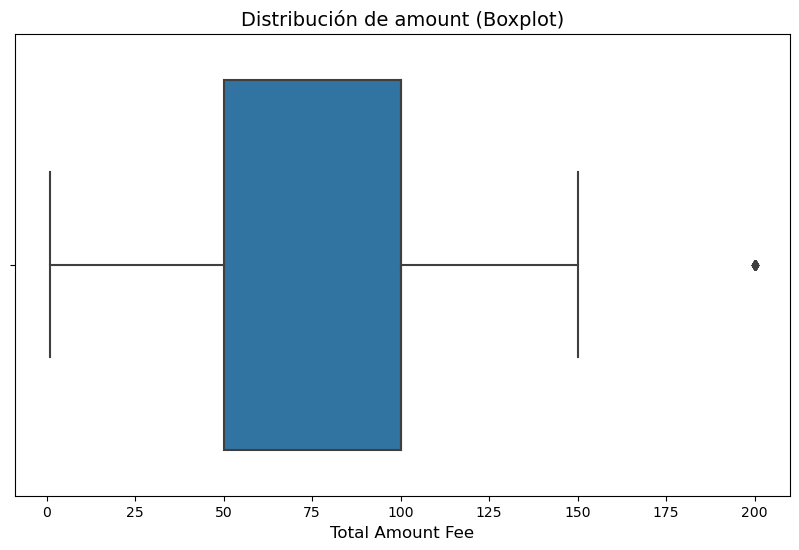

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un boxplot para total_amount_fee
plt.figure(figsize=(10, 6))
sns.boxplot(x=cash_request_df['amount'])

# Agregar título y etiquetas
plt.title('Distribución de amount (Boxplot)', fontsize=14)
plt.xlabel('Total Amount Fee', fontsize=12)
plt.show()

In [10]:
outlier2 = cash_request_df[cash_request_df['amount'] == 200]
print(outlier2)

         id  amount      status                     created_at  \
467    1140   200.0    rejected  2020-04-11 13:26:58.710517+00   
557     885   200.0    rejected  2020-03-15 13:45:07.357731+00   
727    1032   200.0    rejected  2020-04-03 06:14:19.552837+00   
763    1967   200.0  money_back  2020-05-18 07:57:49.949907+00   
980    1732   200.0  money_back   2020-05-13 14:13:57.44829+00   
1349   3575   200.0    rejected  2020-06-17 01:10:51.553474+00   
1510   2099   200.0  money_back  2020-05-21 12:53:43.630055+00   
2282   1556   200.0  money_back  2020-05-05 05:17:40.784144+00   
2332   2184   200.0  money_back  2020-05-26 14:35:16.092311+00   
3061   8659   200.0    rejected   2020-07-17 12:57:31.47223+00   
3221   7401   200.0    rejected  2020-07-09 21:54:35.238416+00   
3363   8958   200.0    rejected  2020-07-19 15:41:31.640664+00   
5530    737   200.0  money_back  2020-02-26 18:05:27.038373+00   
6083    843   200.0  money_back  2020-03-11 07:23:35.317042+00   
6874   131

In [11]:
print(cash_request_df["amount"].describe())


count    23970.000000
mean        82.720818
std         26.528065
min          1.000000
25%         50.000000
50%        100.000000
75%        100.000000
max        200.000000
Name: amount, dtype: float64
